# PROYECTO

In [2]:
import numpy as np, pandas as pd, seaborn as sns, sklearn as sk, matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [52]:
data_set = np.load("proyecto_training_data.npy")
forma = data_set.shape
print(forma)

(1460, 6)


Se separa el data set original para realizar dejar el 80% para la fase de entrenamiento y el 20% restante para la fase de prueba.
Como se vió arriba el data_set tiene una forma igual a (1480, 6) por lo que se realiza un data set con forma (1168, 6) como entrenamiento y la porción con la forma (292, 6) para prueba. Se utiliza un slicing para realizar la separación.

In [58]:
data_train = data_set[:int(forma[0]*0.8),::]
data_test = data_set[int(forma[0]*0.8)::,::]

## Analisis exploratorio de datos

Para cada variable del data set original se encontrará:
- Media
- Valor máximo
- Valor mínimo
- Rango (peak to peak)
- Desviación estándar

Utilizando numpy el proceso es:

In [59]:
# Encontrar la media ignorando los NaN
media = np.nanmean(data_set, axis = 0)
print("La media por cada variable es: \n" + str(media))

La media por cada variable es: 
[1.80921196e+05 6.09931507e+00 1.16262671e+03 6.51780822e+00
 1.97126781e+03 7.00499584e+01]


In [60]:
# Encontrando los valores máximos y mínimos ignorando los NaN
maximo = np.nanmax(data_set, axis = 0)
print("El máximo de cada variable es: \n" + str(maximo))
minimo = np.nanmin(data_set, axis = 0)
print("\nEl minimo de cada variable es: \n" + str(minimo))

El máximo de cada variable es: 
[7.550e+05 1.000e+01 4.692e+03 1.400e+01 2.010e+03 3.130e+02]

El minimo de cada variable es: 
[3.490e+04 1.000e+00 3.340e+02 2.000e+00 1.872e+03 2.100e+01]


In [61]:
# Desviación estandar ignorando los NaN
std = np.nanstd(data_set, axis = 0)
print("La desviación estándar de cada variable es: \n"+str(std))

La desviación estándar de cada variable es: 
[7.94152919e+04 1.38252284e+00 3.86455322e+02 1.62483655e+00
 3.01925588e+01 2.42746394e+01]


In [62]:
# Para encontrar el rango (peak to peak) es el resultado de la diferencia entre el máximo y el minimo de cada variable
# Como estos fueron calculados anteriormente ignorando los valores NaN queda como:
rango = maximo - minimo
print("El rango es: \n"+str(rango))

El rango es: 
[7.201e+05 9.000e+00 4.358e+03 1.200e+01 1.380e+02 2.920e+02]


***
Otra forma de sacar la media, valor máximo, mínimo, etc. Es creando un dataframe en pandas para describir cada variable.

In [63]:
df = pd.DataFrame(data_set, columns = ["SalePrice","OverallQual","1stFlrSF","TotRmsAbvGr","YearBuilt","LotFrontage"])
df_describe = df.describe(percentiles = None, include = None)
df_describe

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGr,YearBuilt,LotFrontage
count,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1201.000000
mean,180921.195890,6.099315,1162.626712,6.517808,1971.267808,70.049958
std,79442.502883,1.382997,386.587738,1.625393,30.202904,24.284752
min,34900.000000,1.000000,334.000000,2.000000,1872.000000,21.000000
25%,129975.000000,5.000000,882.000000,5.000000,1954.000000,59.000000
50%,163000.000000,6.000000,1087.000000,6.000000,1973.000000,69.000000
75%,214000.000000,7.000000,1391.250000,7.000000,2000.000000,80.000000
max,755000.000000,10.000000,4692.000000,14.000000,2010.000000,313.000000


Para conocer el rango se realiza:

In [64]:
df_rango = df_describe.loc["max"]-df_describe.loc["min"]
df_rango

SalePrice      720100.0
OverallQual         9.0
1stFlrSF         4358.0
TotRmsAbvGr        12.0
YearBuilt         138.0
LotFrontage       292.0
dtype: float64

***
## Histograma de cada variable

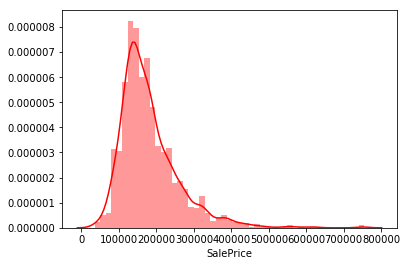

In [65]:
var_1 = sns.distplot(df["SalePrice"], color = "r")

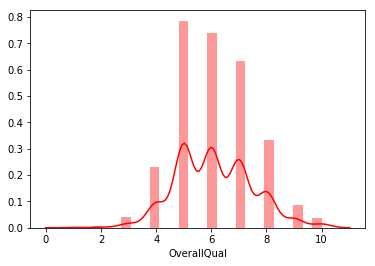

In [66]:
var_2 = sns.distplot(df["OverallQual"], color = "r")

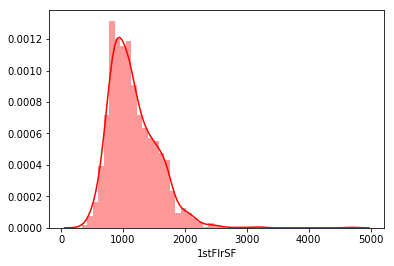

In [67]:
var_3 = sns.distplot(df["1stFlrSF"], color = "r")

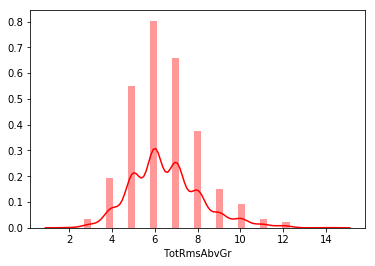

In [68]:
var_4 = sns.distplot(df["TotRmsAbvGr"], color = "r")

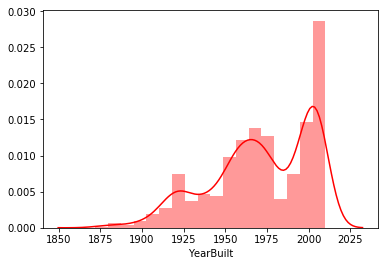

In [69]:
var_5 = sns.distplot(df["YearBuilt"], color = "r")

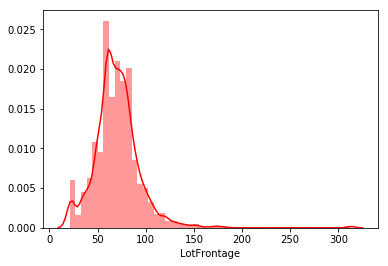

In [70]:
var_6 = sns.distplot(df["LotFrontage"].dropna(), color = "r")

***
## Coeficiente de correlación por cada variable

In [71]:
correlacion = df.corr()
correlacion

,SalePrice,OverallQual,1stFlrSF,TotRmsAbvGr,YearBuilt,LotFrontage
SalePrice,1.000000,0.790982,0.605852,0.533723,0.522897,0.351799
OverallQual,0.790982,1.000000,0.476224,0.427452,0.572323,0.251646
1stFlrSF,0.605852,0.476224,1.000000,0.409516,0.281986,0.457181
TotRmsAbvGr,0.533723,0.427452,0.409516,1.000000,0.095589,0.352096
YearBuilt,0.522897,0.572323,0.281986,0.095589,1.000000,0.123349
LotFrontage,0.351799,0.251646,0.457181,0.352096,0.123349,1.000000


***
## Gráficas Xn VS Y

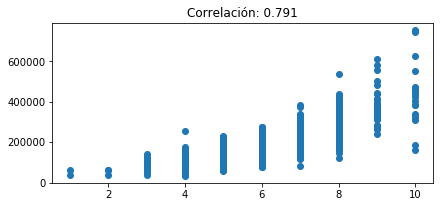

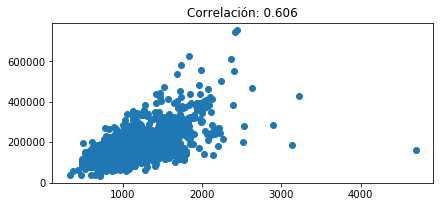

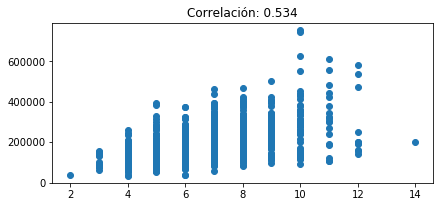

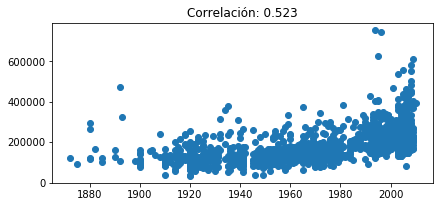

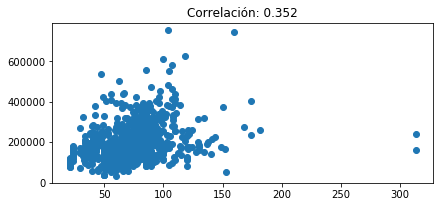

In [72]:
for z in range(1, 6):
    graficas = plt.figure(figsize = (15,10))
    plt.subplot(3,2,z)
    plt.scatter(data_set[::,z], data_set[::,0]);
    plt.title("Correlación: "+str('%.3f' % correlacion["SalePrice"][z]))

***
## Modelos a trabajar

Se escogen los 2 pares (X, Y) con mayor correlación, estos son:
* (OverallQual, SalesPrices)
* (1stFlrSF, SalesPrices)

***
## Función para entrenar el modelo lineal

In [73]:
def train_func(data_X, data_Y, epoch, print_error, lr):
    # Vector de la forma [data_X, 1]
    shape_X = data_X.shape
    X = np.ones((shape_X[0],2))
    X[::,0] *= data_X
    # Vector de errores
    vector_error = np.zeros(epoch)
    # Parametros
    mb = np.array([2,2])
    # Estructura de datos con el modelo resultante
    resultado = {}
    # Iteraciones epoch
    for z in range(0, epoch):
        # Cálculo y_hat
        y_hat = np.matmul(X, mb)
        # Cálculo error
        error = 0.5 * np.mean((y_hat - data_Y)**2)
        vector_error[z] = error
        # Intervalos impresión errores
        if (z%print_error == 0):
            print("Para la iteración " + str(z) + " el error es: \n" + str(vector_error[z]) + "\n =============== \n")
        # Calculo del gradiente m y b
        gradiente = np.array([np.mean((y_hat - data_Y) * data_X), np.mean((y_hat - data_Y) * 1)])
        # Actualizar los parámetros del modelo de regresión
        mb = np.array([mb[0]-lr*gradiente[0], mb[1]-lr*gradiente[1]])
        resultado[z] = mb
    return resultado, vector_error

***
## Función visualización cambio del error en el tiempo

In [74]:
def time_error(vector_error):
    graph_error = plt.figure(figsize = (10,5))
    plt.plot(vector_error)
    plt.title("Cambio del error en el tiempo")
    return

***
## Función visualización cambio del modelo entrenado en el tiempo

In [75]:
def time_train(resultado, n, n_var):
    # n_var será el número de variable X que queramos gráficar
    shape_X = data_train.shape
    X = np.ones((shape_X[0],2))
    X[::,0] *= data_train[::,n_var]
    graficas = plt.figure(figsize = (15,10))
    plt.scatter(data_set[::,n_var], data_set[::,0]);
    plt.title("Evolución del modelo de entrenado en el tiempo")
    for z in range(0, len(resultado)):    
        if (z%n == 0):
            y_hat = np.matmul(X, resultado[z])
            plt.plot(data_train[::,n_var], y_hat)
    return

***
## Entrenando modelos de regresión lineal

In [86]:
resultado_x1, vector_error_x1 = train_func(data_train[::,1],data_train[::,0], 200, 50,0.0009)

Para la iteración 0 el error es: 
19406985081.963184

Para la iteración 50 el error es: 
1851157823.4151714

Para la iteración 100 el error es: 
1404289630.9796798

Para la iteración 150 el error es: 
1391922651.3884854



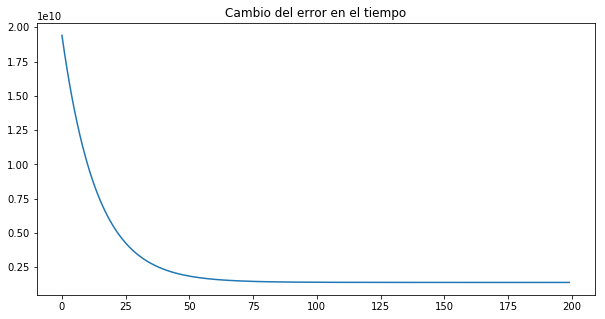

In [77]:
time_error(vector_error_x1)

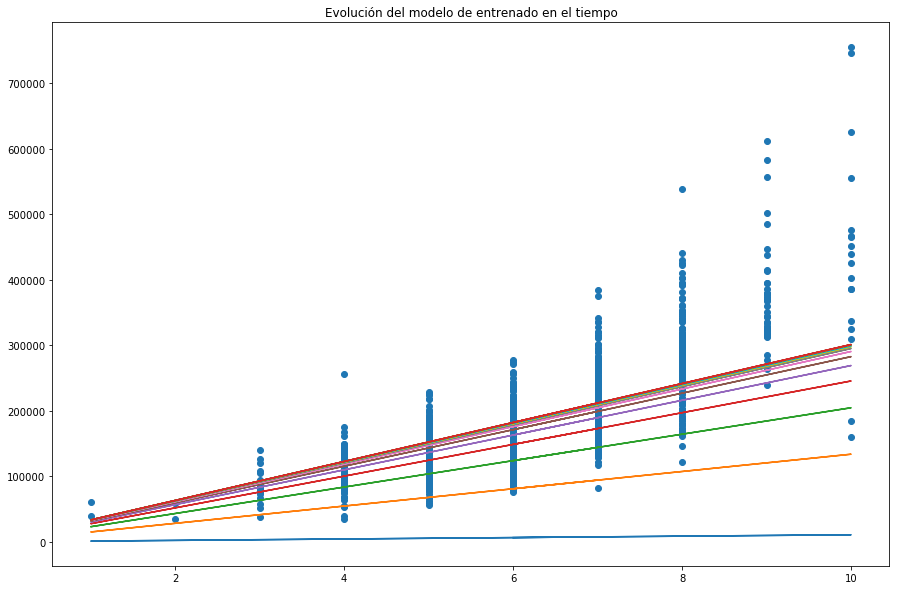

In [78]:
time_train(resultado_x1, 15, 1)

### Variable X2

In [79]:
resultado_x2, vector_error_x2 = train_func(data_train[::,2],data_train[::,0], 300, 50,15e-9)

Para la iteración 0 el error es: 
18958396895.52483

Para la iteración 50 el error es: 
3777002324.094984

Para la iteración 100 el error es: 
2160677914.466745

Para la iteración 150 el error es: 
1988591966.7917857

Para la iteración 200 el error es: 
1970270408.8402748

Para la iteración 250 el error es: 
1968319753.7347167



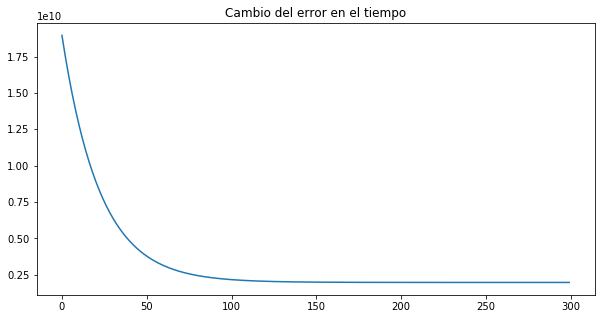

In [80]:
time_error(vector_error_x2)

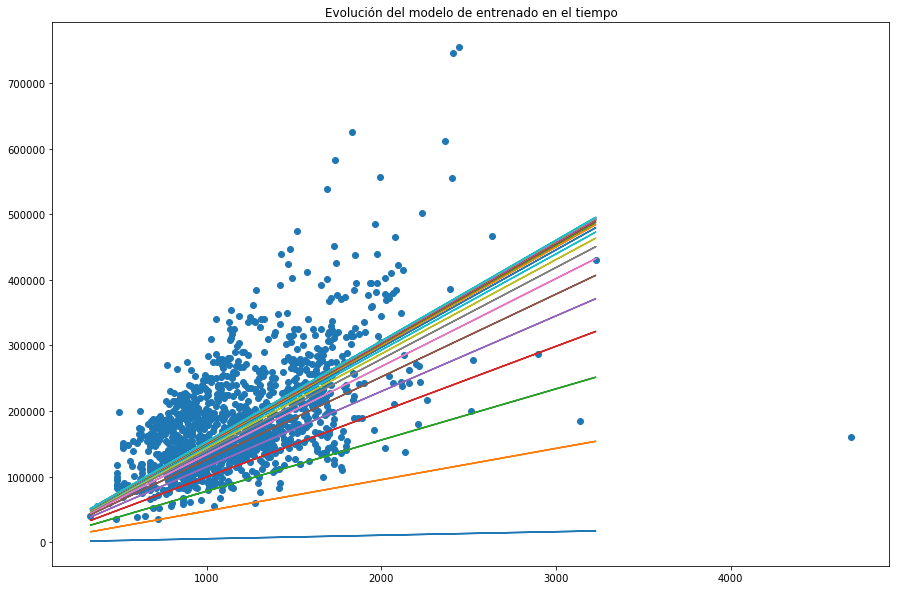

In [81]:
time_train(resultado_x2, 15, 2)

***
## Usando Scikit-learn para entrenar un modelo de regresión lineal

* Para (OverallQual, SalesPrices)

In [82]:
model_1 = LinearRegression()
model_1.fit(data_train[::,1].reshape(-1,1), data_train[::,0])
print(model_1.coef_)
print(model_1.intercept_)

[45411.99877916]
-96469.57131873936


* Para (1stFlrSF, SalesPrices)

In [83]:
model_2 = LinearRegression()
model_2.fit(data_train[::,2].reshape(-1,1), data_train[::,0])
print(model_2.coef_)
print(model_2.intercept_)

[129.95124229]
30324.585174963693


***
## Promedio modelo manual y modelo obtenido de scikit-learn

In [84]:
def predicciones(modelo_manual, modelo_scikit, X, Y):
    
    return

***
## Cálculo de errores para cada modelo